# Virtual Insight Week 2021

In [1]:
# TODO input checks don't account for empty input

from time import sleep

import pandas as pd
import matplotlib.pyplot as plt

prices = [
    ("Whey Protein", 8.99),
    ("Protein Bar", 1.50),
    ("Workout Leggings", 42.00),
    ("MP T-Shirt", 15.00),
    ("Multivitamin Tablets", 7.99),
    ("Cycling Shorts", 19.99),
    ("Shaker", 5.00),
    ("Pre-Workout", 39.99),
    ("Sugar-free Syrup", 6.49),
    ("Protein Spread", 6.99)
]

shopping_cart = []

discount = 0.15

def print_start_menu():
    print("\t\tWelcome to MyProtein Virtual Shop!\n\n\tAt MyProtein, we strive to deliver the best products on the market, \n\tin the most efficient manner possible. As such, we have created the \n\tTerminal Virtual Shopping System, just for you!\n\n\tPlease note that guest shopping is currently the only supported mode \n\tof browsing. Stay tuned for the upcoming cool features!")
    
def print_choice_menu():
    print("""\n\t  Choose one of the following options:
    \t1. Shop
    \t2. Checkout
    \t3. Exit""")

def menu_choice():
    choice = input("\n\t> ")
    
    if(choice[0] in "1Ss"):
        while(True):
            if(start_shopping()):
                break
    elif(choice[0] in "2Cc"):
        return checkout()
    elif(choice[0] in "03Ee"):
        return True
    else:
        print("\nI didn't quite get that. Please input a valid option. ):")

def start_shopping():
    global prices

    print("\n\tChoose an item or 'Return' to return: ")
    for i in range(len(prices)):
        print(f"\t{i + 1}. {prices[i][0]}: £{'{:.2f}'.format(prices[i][1])}")

    if(shopping_choice()):
        return True

def shopping_choice():
    global prices

    while(True):
        choice = input("\n\t> ")

        if(choice[0] == "0" or choice.lower() in "return"):
            return True
        elif(choice.isnumeric() and int(choice) <= len(prices)):
            item = prices[int(choice) - 1]
            number = shopping_number_choice(item)

            add_item(item, number)
            print(f"\n\tAdded {number} of {item[0]} to the shopping cart.")
            
            if(shop_more()):
                return True

            break
        else:
            print("\tI didn't quite get that. Please input a valid number.")

def shop_more():
    print("\n\t  Choose an option:\n\t1. Keep shopping\n\t2. Return")

    while(True):
        choice = input("\n\t> ")

        if(choice[0] in "kK1"):
            return
        elif(choice[0] in "rR2"):
            return True

def add_item(item, number):
    global shopping_cart

    if(number == 0):
        return
    
    if(item not in [i[0] for i in shopping_cart]):
        shopping_cart.append([item, number])
    else:
        for i in range(len(shopping_cart)):
            if(item == shopping_cart[i][0]):
                shopping_cart[i][1] += number
                return

def shopping_number_choice(item):

    print(f"\n\tHow many of {item[0]} do you want?")
    
    while(True):
        choice = input("\n\t> ")

        if(choice.isnumeric()):
            return int(choice)
        else:
            print("\n\tI didn't quite get that. Please input a valid number.")

def checkout():
    print("\n\t  Items in your shopping cart:")
    print_shopping_cart()

    return checkout_choice()

def print_shopping_cart():
    global shopping_cart

    for i in range(len(shopping_cart)):
        items_price = "{:.2f}".format(shopping_cart[i][0][1] * shopping_cart[i][1])
        print(f"\t{i + 1}. {shopping_cart[i][0][0]}: {shopping_cart[i][1]} items, £{items_price} total")
    running_total = "{:.2f}".format(total_price())
    print(f"\t   Total price: £{running_total}")

def checkout_choice():
    print("\n\tChoose an option:\n\t1. Change amount\n\t2. Order\n\t3. Return")

    while(True):
        choice = input("\n\t> ")

        if(choice[0] in "1Cc"):
            change_amount()
            return checkout()
        elif(choice[0] in "2Oo"):
            discounted_price = calculate_total_discount()

            #TODO additional discount

            print(f"\n\t  Congratulations! As a thank you for testing the application, \n\tyou received a 15% discount! This puts your total order price at only £{discounted_price}, \n\twith a total discount of {discount * 100}%!")
            print("\n\tUnfortunately, the Terminal Virtual Shopping Assistant  does not \n\tsupport online ordering at the moment. ):\n\n\tWe are aware of how outrageous this sounds, but in the eventuality \n\tthat you are still willing to buy from us, here's a link to the website \n\tyou can buy these products from!\n\t\t\thttps://www.myprotein.com/")

            return True
        elif(choice[0] in "3Rr"):
            return True
        else:
            print("\n\tI didn't quite get that. Please choose one of the options.")

def calculate_total_discount():
    global discount

    discounted_price = total_price()

    if(total_price() > 50):
        discount += 0.05
        print("\n\tYou are buying items of value 50 or greater. That means you get an additional 5% off!")
    if(total_price() > 100):
        discount += 0.05
        print("\tYou are buying items of value 100 or greater. That means you get an additional 5% off!")
    if(total_price() > 200):
        discount += 0.10
        print("\tYou are buying items of value 200 or greater. That means you get an additional 10% off!")

    discounted_price = discount_price(total_price(), discount)

    return "{:2f}".format(discounted_price)

def discount_price(price, discount):
    return price * (1 - discount)

def total_price():
    global shopping_cart

    s = 0
    for item in shopping_cart:
        s += item[0][1] * item[1]
    
    return s

def change_amount():
    print("\n\tWhich item do you want to change?")
    print_shopping_cart()
    
    while(True):
        choice = input("\n\t> ")

        if(choice.isnumeric() and int(choice) <= len(shopping_cart)):
            print(f"\n\tThere is {shopping_cart[int(choice) - 1][1]} of {shopping_cart[int(choice) - 1][0][0]} in the cart. \n\tInput the new amount:")

            while(True):
                number = input("\n\t> ")

                if(number.isnumeric()):
                    if(int(number) == 0):
                        del shopping_cart[int(choice) - 1]
                    else:
                        shopping_cart[int(choice) - 1][1] = int(number)
                    print("\n\tSuccessfully updated.")
                    return True
                else:
                    print("\n\tI did not quite get it. Please input a valid integer.")
        else:
            print(f"\n\tI did not quite get it. Please input a number from 1 to {len(shopping_cart)}")


In [2]:
if __name__ == "__main__":
    print_start_menu()
    # sleep(0.3)
    while(True):
        # print(shopping_cart)
        print_choice_menu()
        if(menu_choice()):
            print("\n\tThank you for shopping with us!")
            break

		Welcome to MyProtein Virtual Shop!

	At MyProtein, we strive to deliver the best products on the market, 
	in the most efficient manner possible. As such, we have created the 
	Terminal Virtual Shopping System, just for you!

	Please note that guest shopping is currently the only supported mode 
	of browsing. Stay tuned for the upcoming cool features!

	  Choose one of the following options:
    	1. Shop
    	2. Checkout
    	3. Exit

	> ded

I didn't quite get that. Please input a valid option. ):

	  Choose one of the following options:
    	1. Shop
    	2. Checkout
    	3. Exit

	> 1

	Choose an item or 'Return' to return: 
	1. Whey Protein: £8.99
	2. Protein Bar: £1.50
	3. Workout Leggings: £42.00
	4. MP T-Shirt: £15.00
	5. Multivitamin Tablets: £7.99
	6. Cycling Shorts: £19.99
	7. Shaker: £5.00
	8. Pre-Workout: £39.99
	9. Sugar-free Syrup: £6.49
	10. Protein Spread: £6.99

	> 7

	How many of Shaker do you want?

	> 2

	Added 2 of Shaker to the shopping cart.

	  Choose an option

([<matplotlib.patches.Wedge at 0x7f57911e2810>,
 [Text(1.0160604678935001, 0.42145121376505956, 'Shaker'),
  Text(-1.0160604876230541, -0.4214511661998357, 'Protein Spread')])

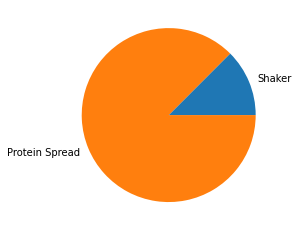

In [3]:
names_prices = pd.DataFrame([(i[0][0], i[1] * i[0][1]) for i in shopping_cart])
names_prices.head()

plt.pie(names_prices[1], labels = names_prices[0])

([<matplotlib.patches.Wedge at 0x7f578f0d3950>,
 [Text(0.7405876056743638, 0.8133449442404578, 'MP T-Shirt'),
  Text(-1.0999999248140115, -0.0004067052607835536, 'Multivitamin Tablets'),
  Text(0.6626496694909653, -0.8780065008435386, 'Cycling Shorts'),
  Text(1.0953009509634177, -0.1015668588597336, 'Shaker')])

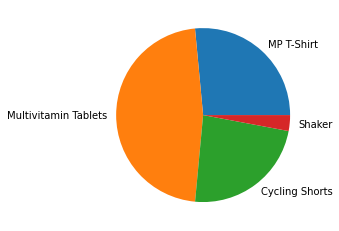

In [4]:
shopping_cart = [
    [("MP T-Shirt", 15.00), 3],
    [("Multivitamin Tablets", 7.99), 10],
    [("Cycling Shorts", 19.99), 2],
    [("Shaker", 5.00), 1]
]

names_prices = pd.DataFrame([(i[0][0], i[1] * i[0][1]) for i in shopping_cart])
names_prices.head()

plt.pie(names_prices[1], labels = names_prices[0])